In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/master_3.csv')

In [3]:
df.head()

,index,subject_id,stay_id,intime,outtime,gender,in_year,age,outcome_inhospital_mortality,ed_death,...,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
0,335314,10000032,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180,52,False,False,...,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0
1,335315,10000032,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,0,2180,52,False,False,...,1,36.611111,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0
2,335316,10000032,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,0,2180,52,False,False,...,1,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0
3,335317,10000032,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2180,52,False,False,...,1,37.222222,96.0,18.0,97.0,86.0,45.0,0.0,8.0,14.0
4,335318,10000032,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,0,2180,52,False,False,...,1,36.722222,91.0,18.0,99.0,98.0,60.0,0.0,6.0,7.0


## 필요없는 변수 제거하기

- ['intime', 'outtime', 'ed_los'] 는 이미 ed_los_hour 에 반영되어 있기 때문에 제거 처리함
- index 필요없음
- eci_ 로 시작하는 변수들은 cci_와 매우 비슷하기 때문에 제거 처리함
- outcome_icu_transfer_12h 변수는 target과 상관관계가 0.98정도로 매우 높아서 제거 처리함

In [6]:
df = df.drop(['intime', 'outtime', 'ed_los', 'index'], axis=1)

In [7]:
df = df.drop(list(df.filter(regex='eci_').columns) + ['outcome_icu_transfer_12h'], axis=1)

- 상관계수 확인

In [3]:
obj = pd.DataFrame(df.dtypes == 'object')
corr_df = df[obj[obj[0] != True].index].corr(method='pearson')

In [4]:
s = corr_df.unstack()
corr_val = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corr_val.style.background_gradient(cmap='viridis')

> 서로 연관성이 높은 것이 확인되지만 \
> 연관성이 높을 수 밖에 없는 변수라서 (입원 기간) 그냥 그대로 진행

In [8]:
len(df.columns)

65

## forward selection

In [6]:
import pandas as pd
import numpy as np

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [8]:
y = df['outcome_critical']
x = df.drop(['outcome_critical'], axis=1)

In [15]:
lr = LinearRegression()
sfs1 = sfs(lr, k_features=20, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [18]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   23.9s finished

[2022-06-10 23:16:08] Features: 1/20 -- score: -0.05242964013542408[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   44.9s finished

[2022-06-10 23:16:53] Features: 2/20 -- score: -0.04894451581460697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   58.1s finished

[2022-06-10 23:17:52] Features: 3/20 -- score: -0.04714273383581674[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

In [20]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['gender', 'age', 'outcome_inhospital_mortality', 'outcome_hospitalization', 'n_hosp_365d', 'n_icu_365d', 'ed_los_hours', 'triage_resprate', 'triage_sbp', 'triage_acuity', 'chiefcom_chest_pain', 'chiefcom_abdominal_pain', 'chiefcom_fever_chills', 'ed_heartrate_last', 'ed_resprate_last', 'ed_sbp_last', 'ed_dbp_last', 'ed_pain_last', 'n_med', 'n_medrecon']


## backward selection

In [28]:
lr2 = LinearRegression()
sfs2 = sfs(lr2, k_features=20, forward=False, verbose=1, scoring='neg_mean_squared_error', n_jobs=6)

In [29]:
sfs2 = sfs2.fit(x, y)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


In [ ]:
feat_names2 = list(sfs2.k_feature_names_)
print(feat_names2)

## 랜덤 포레스트로 피쳐 선택

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x, y)

RandomForestClassifier(random_state=0)

In [26]:
feat_names = ['gender', 'age', 'outcome_inhospital_mortality', 'outcome_hospitalization', 'n_hosp_365d', 'n_icu_365d', 'ed_los_hours', 'triage_resprate', 'triage_sbp', 'triage_acuity', 'chiefcom_chest_pain', 'chiefcom_abdominal_pain', 'chiefcom_fever_chills', 'ed_heartrate_last', 'ed_resprate_last', 'ed_sbp_last', 'ed_dbp_last', 'ed_pain_last', 'n_med', 'n_medrecon']

In [30]:
d = pd.DataFrame(feat_importances.nlargest(30))
d['feat_names'] = feat_names + [0] * 10

In [32]:
d.to_csv('../dataset/feature.csv')

<AxesSubplot:>

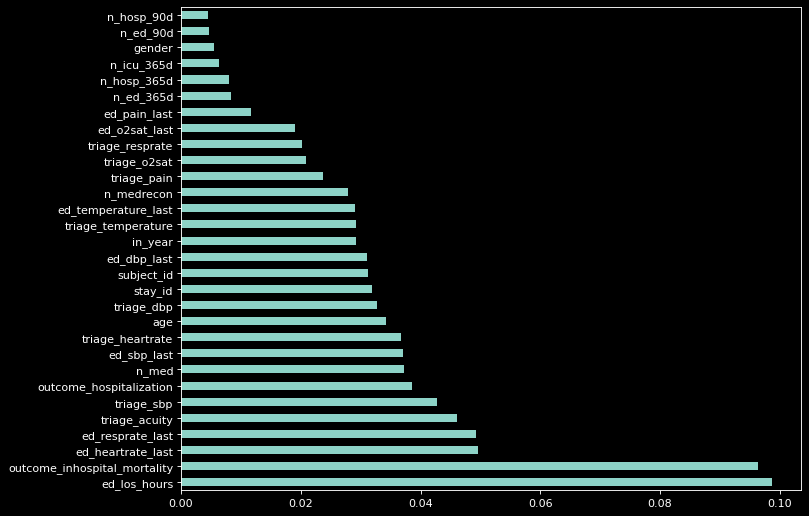

In [22]:
plt.figure(num=None, figsize=(10,8), dpi=80, edgecolor='k')
feat_importances = pd.Series(clf.feature_importances_, index= x.columns)
feat_importances.nlargest(30).plot(kind='barh')

## 새로운 변수 추가

In [34]:
def add_score_CCI(df):
    conditions = [
        (df['age'] < 50),
        (df['age'] >= 50) & (df['age'] <= 59),
        (df['age'] >= 60) & (df['age'] <= 69),
        (df['age'] >= 70) & (df['age'] <= 79),
        (df['age'] >= 80)
    ]
    values = [0, 1, 2, 3, 4]
    df['score_CCI'] = np.select(conditions, values)    
    df['score_CCI'] = df['score_CCI'] + df['cci_MI'] + df['cci_CHF'] + df['cci_PVD'] + df['cci_Stroke'] + df['cci_Dementia'] + df['cci_Pulmonary'] + df['cci_PUD'] + df['cci_Rheumatic'] +df['cci_Liver1']*1 + df['cci_Liver2']*3 + df['cci_DM1'] + df['cci_DM2']*2 +df['cci_Paralysis']*2 + df['cci_Renal']*2 + df['cci_Cancer1']*2 + df['cci_Cancer2']*6 + df['cci_HIV']*6

In [35]:
add_score_CCI(x)

In [11]:
x_sel = x[['gender', 'age', 'outcome_inhospital_mortality', 'outcome_hospitalization', 'n_hosp_365d', 'n_icu_365d', 'ed_los_hours', 'triage_resprate', 'triage_sbp', 'triage_acuity', 'chiefcom_chest_pain', 'chiefcom_abdominal_pain', 'chiefcom_fever_chills', 'ed_heartrate_last', 'ed_resprate_last', 'ed_sbp_last', 'ed_dbp_last', 'ed_pain_last', 'n_med', 'n_medrecon'] + ['stay_id', 'score_CCI']]

In [46]:
x_rf = x[list(pd.DataFrame(feat_importances.nlargest(20)).index) + ['stay_id', 'score_CCI']]

### 성능비교

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022) # 80% training and 20% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_sel, y, test_size=0.2, random_state=2022) # 80% training and 20% test
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_rf, y, test_size=0.2, random_state=2022) # 80% training and 20% test

In [22]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=2022)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))

훈련세트 정확도: 1.000
테스트세트 정확도: 0.957


In [25]:
rand_clf2 = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=2022)

rand_clf2.fit(X_train2, y_train2)
y_pred2 = rand_clf2.predict(X_test2)

print('훈련세트 정확도: {:.3f}' .format(rand_clf2.score(X_train2, y_train2)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf2.score(X_test2, y_test2)))

훈련세트 정확도: 1.000
테스트세트 정확도: 0.957


In [53]:
rand_clf3 = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=2022)

rand_clf3.fit(X_train3, y_train3)
y_pred3 = rand_clf3.predict(X_test3)

print('훈련세트 정확도: {:.3f}' .format(rand_clf3.score(X_train3, y_train3)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf3.score(X_test3, y_test3)))

훈련세트 정확도: 1.000
테스트세트 정확도: 0.958


## 샘플링

In [57]:
from imblearn.combine import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NeighbourhoodCleaningRule 

In [12]:
Counter(y)

Counter({False: 419387, True: 29585})

In [ ]:
plt.style.use(['seaborn'])
x = ['False', 'True']
plt.figure(figsize=(5, 5))
plt.rc('xtick', labelsize=20)
values = [y_samp_over.value_counts()[0], y_samp_over.value_counts()[1]]
bar = plt.bar(x, values, color=['r','g'])
plt.ylim(0, 30000)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 17)
plt.show()

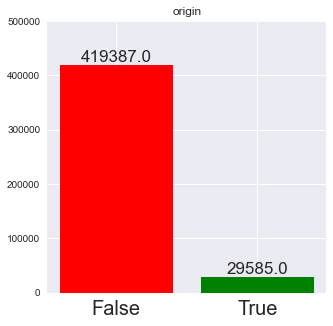

In [92]:
x = ['False', 'True']
plt.style.use(['seaborn'])
plt.figure(figsize=(5, 5))
plt.rc('xtick', labelsize=20)
values = [Counter(y)[0], Counter(y)[1]]
plt.title('origin')
bar = plt.bar(x, values, color=['r','g'])
plt.ylim(0, 500000)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 17)
plt.show()

In [13]:
merge_df = pd.concat([x_sel, y], axis=1)
merge_df.to_csv('../dataset/master_4.csv', index=False)

### 믹스 
> 연산량이 너무 많아서 언더 방식으로 선회

In [22]:
x_samp, y_samp = SMOTEENN(random_state=20, n_jobs=8, sampling_strategy='minority').fit_resample(x_sel, y)
Counter(y_samp)

In [ ]:
df.to_csv('../dataset/master_4.csv', index_col=False)

In [15]:
x_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_resample(x_sel, y)

### 언더

In [19]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x_sel, y)

In [20]:
merge_dflite = pd.concat([x_under, y_under], axis=1)

In [23]:
merge_dflite.to_csv('../dataset/master_4_lite.csv', index=False)

In [24]:
Counter(y_under)

Counter({False: 29585, True: 29585})

## 다중 공선성 제거 (제외)

In [6]:
len(df.columns)

65

In [13]:
obj = pd.DataFrame(df.dtypes != 'object')
drop_df = df[obj[obj[0] == True].index]

In [31]:
y = drop_df['outcome_critical']
x = drop_df.drop(['outcome_critical'], axis=1)

In [36]:
drop_df

,subject_id,stay_id,gender,in_year,age,outcome_inhospital_mortality,ed_death,before_ed_mortality,outcome_hospitalization,outcome_critical,...,cci_HIV,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
0,10000032,33258284,0,2180,52,False,False,False,True,False,...,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0
1,10000032,38112554,0,2180,52,False,False,False,True,False,...,0,36.611111,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0
2,10000032,32952584,0,2180,52,False,False,False,True,True,...,0,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0
3,10000032,39399961,0,2180,52,False,False,False,True,True,...,0,37.222222,96.0,18.0,97.0,86.0,45.0,0.0,8.0,14.0
4,10000032,35968195,0,2180,52,False,False,False,True,False,...,0,36.722222,91.0,18.0,99.0,98.0,60.0,0.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448967,19999784,34149746,1,2119,57,False,False,False,True,False,...,0,36.722222,72.0,16.0,100.0,131.0,92.0,0.0,1.0,8.0
448968,19999828,30712109,0,2147,46,False,False,False,True,False,...,0,37.555556,78.0,17.0,99.0,108.0,87.0,9.0,11.0,8.0
448969,19999828,32917002,0,2149,48,False,False,False,True,True,...,0,36.722222,109.0,15.0,96.0,111.0,78.0,4.0,8.0,11.0
448970,19999914,32002659,0,2158,49,False,False,False,False,False,...,0,37.500000,81.0,10.0,100.0,93.0,55.0,0.0,5.0,0.0
